In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train=pd.read_csv('/home/alejandrolive932/Desktop/PYTHON 3/Udemy_Data_Science_and_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')
train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

# We will use seaborn to plot a heatmap and see where we have more amount of lost data

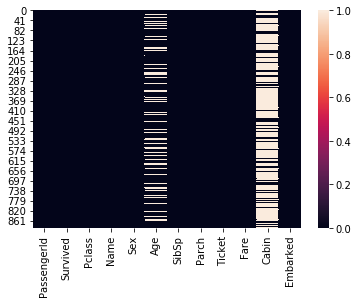

In [5]:
sns.heatmap(train.isnull())

In [6]:
train.drop(['Cabin'],axis=1,inplace=True)
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

1. let's find out how many persons survived  by categories of genre

In [7]:
table=train[['Survived','Sex']]
f_survived=len(table[(table['Sex']=='female') & (table['Survived']==1)])
m_survived=len(table[(table['Sex']=='male') & (table['Survived']==1)])
total_f=len(table[table['Sex']=='female'])
total_m=len(table[table['Sex']=='male'])
f_died=total_f-f_survived
m_died=total_m-m_survived
pd.DataFrame(index=[['Femanle','Male']],columns=[['Survived','Died','Total']],data=np.array([[f_survived,f_died,total_f],[m_survived,m_died,total_m]]))

Survived Died Total
Femanle      233   81   314
Male         109  468   577

* Create a bar plot of the persons that died and survived by sex:

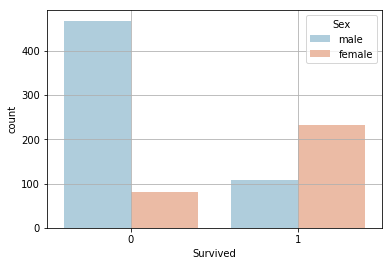

In [8]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')
plt.grid(True)

* Create a bar plot of the persons that died and survived by class:

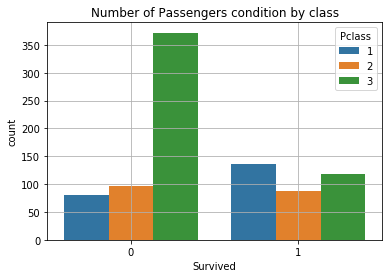

In [9]:
sns.countplot(x='Survived',data=train,hue='Pclass')
plt.title('Number of Passengers condition by class')
plt.grid(True)

Text(0.5,1,'Distribution of Age Passengers')

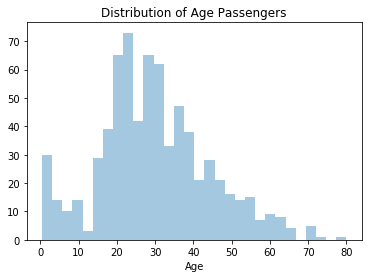

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
plt.title('Distribution of Age Passengers')

* what is the percentage of persons that survived in different classes

In [13]:
#Percentage of persons that survived in class 1
tc1=100*(len(train[(train['Pclass']==1) & (train['Survived']==1)])) / (len(train[train['Pclass']==1]))
#Percentage of persons that survived in class 2
tc2=100*(len(train[(train['Pclass']==2) & (train['Survived']==1)])) / (len(train[train['Pclass']==2]))
#Percentage of persons that survived in class 3
tc3=100*(len(train[(train['Pclass']==3) & (train['Survived']==1)])) / (len(train[train['Pclass']==3]))
table2=pd.DataFrame(index=[['1 Class','2 Class','3 Class']],columns=[['% Survived','% Died']],data=np.array([[tc1,100-tc1],[tc2,100-tc2],[tc3,100-tc3]]))
table2


% Survived     % Died
1 Class  62.962963  37.037037
2 Class  47.282609  52.717391
3 Class  24.236253  75.763747

* Create a bar plot that shows how many relatives were in the titanic with the passengers during the accident

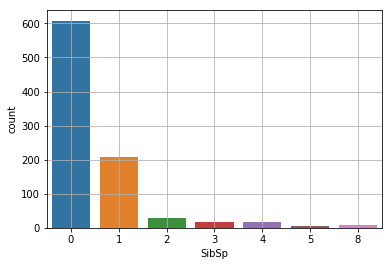

In [14]:
sns.countplot(train['SibSp'])
plt.grid(True)

* Plot an histogram of the fares payed

/home/alejandrolive932/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


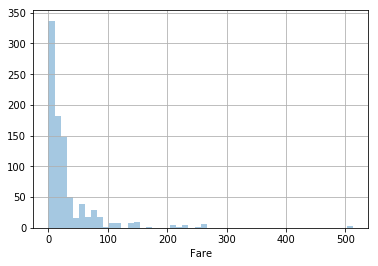

In [15]:
sns.distplot(train['Fare'],kde=False)
plt.grid(True)
#or
#train['Fare'].hist(figsize=(10,4))

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
train['Fare'].iplot(kind='hist')

# Cleaning Tha Data

Fill the 'Age' passenger information that is empty ('NaN') with the average age of people per class

In [19]:
#Mean age of class 1
ma1=train[train['Pclass']==1]['Age'].mean()
#Mean age of class 2
ma2=train[train['Pclass']==2]['Age'].mean()
#Mean age of class 3
ma3=train[train['Pclass']==3]['Age'].mean()
age={'ma1':round(ma1),'ma2':round(ma2),'ma3':round(ma3)}

def inpute_age(column):
    
    if pd.isnull(column[0]):
        if column[1]==1:
            return age['ma1']
        elif column[1]==2:
            return age['ma2']
        else:
            return age['ma3']
    else:
        return column[0]

cols=['Age','Pclass']
train['Age']=train[['Age','Pclass']].apply(inpute_age,axis=1)


* Verify that the 'Age' column has no 'NaN' values any more

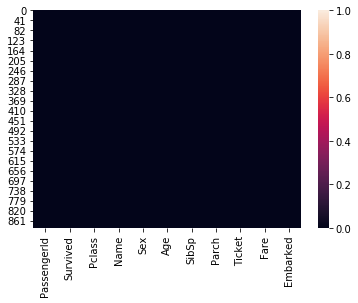

In [20]:
sns.heatmap(train.isnull())

# Creating Dummy Variables
In machine Learning  our algorithms will not work with categorical variables, for instance, the column 'Sex' has two kinds of information,  'male' or 'female', and to create our machine learning algorithm we will  need to transform this categorical variable into numerical values


In [21]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train=pd.concat([train,sex,embarked],axis=1)

In [24]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male  25.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male  30.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female  25.0

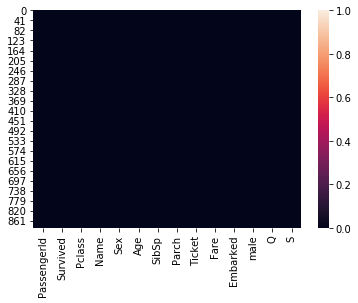

In [25]:
sns.heatmap(train.isnull())

* Let's now remove all the information that we are not going to use in our machine learning algorithm

In [26]:
train.drop(['Sex','Ticket','Embarked','Name'],axis=1,inplace=True)

In [27]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [29]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

# Logistic Regression

In [48]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split as tts

In [56]:
x_train, x_test, y_train, y_test= tts(X,y,test_size=0.3,random_state=44)

In [57]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
prediction=log_reg.predict(x_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       164
          1       0.71      0.68      0.70       104

avg / total       0.77      0.77      0.77       268



* Or if we want the pure confussion matrix to read

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
print(confusion_matrix(y_test,prediction))

[[135  29]
 [ 33  71]]
